# Ford GoBike Bike Trips in San Francisco (February 2019) Dataset Exploration
## by Fatema Mahmoud

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area on February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [7]:
df[df['start_station_id'].isnull() & df['member_birth_year'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
58795,716,2019-02-20 22:28:25.9700,2019-02-20 22:40:22.8700,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4239,Customer,NaN,NaN,No
59280,740,2019-02-20 20:35:21.0110,2019-02-20 20:47:41.5620,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4239,Customer,NaN,NaN,No


In [8]:
df[df['start_station_latitude'] == 37.41]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
8499,240,2019-02-28 08:23:07.0920,2019-02-28 08:27:07.2890,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
8783,883,2019-02-28 07:58:07.3720,2019-02-28 08:12:51.2760,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980.0,Male,No
10967,116,2019-02-27 19:25:57.0360,2019-02-27 19:27:54.0260,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
13945,399,2019-02-27 14:06:51.7720,2019-02-27 14:13:31.6720,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,3975,Subscriber,1995.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153088,789,2019-02-06 13:32:34.6330,2019-02-06 13:45:44.3340,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4092,Subscriber,1999.0,Female,No
154695,968,2019-02-06 09:19:56.8780,2019-02-06 09:36:05.2380,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
155470,984,2019-02-06 08:39:02.6480,2019-02-06 08:55:26.6830,NaN,NaN,37.41,-121.94,NaN,NaN,37.40,-121.92,4249,Subscriber,1976.0,Male,No
161844,823,2019-02-05 13:28:05.5940,2019-02-05 13:41:49.3090,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4092,Subscriber,1999.0,Male,No


In [9]:
df[df['start_station_latitude'] == 37.41].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 3625 to 179970
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             101 non-null    int64  
 1   start_time               101 non-null    object 
 2   end_time                 101 non-null    object 
 3   start_station_id         0 non-null      float64
 4   start_station_name       0 non-null      object 
 5   start_station_latitude   101 non-null    float64
 6   start_station_longitude  101 non-null    float64
 7   end_station_id           0 non-null      float64
 8   end_station_name         0 non-null      object 
 9   end_station_latitude     101 non-null    float64
 10  end_station_longitude    101 non-null    float64
 11  bike_id                  101 non-null    int64  
 12  user_type                101 non-null    object 
 13  member_birth_year        99 non-null     float64
 14  member_gender       

In [10]:
df[df['start_station_latitude'] == df['end_station_latitude']]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
19,874,2019-02-28 23:43:05.1830,2019-02-28 23:57:39.7960,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,5629,Customer,1978.0,Male,No
27,408,2019-02-28 23:48:08.2820,2019-02-28 23:54:56.9300,78.0,Folsom St at 9th St,37.773717,-122.411647,78.0,Folsom St at 9th St,37.773717,-122.411647,5410,Subscriber,1982.0,Male,No
34,471,2019-02-28 23:42:43.3610,2019-02-28 23:50:34.4460,133.0,Valencia St at 22nd St,37.755213,-122.420975,133.0,Valencia St at 22nd St,37.755213,-122.420975,5559,Subscriber,1992.0,Male,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
55,3478,2019-02-28 22:39:35.0200,2019-02-28 23:37:33.3420,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,1846,Subscriber,1995.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183317,1476,2019-02-01 02:45:04.7440,2019-02-01 03:09:41.1840,345.0,Hubbell St at 16th St,37.766483,-122.398279,345.0,Hubbell St at 16th St,37.766483,-122.398279,5224,Subscriber,1967.0,Male,No
183318,877,2019-02-01 02:53:15.9950,2019-02-01 03:07:53.0580,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,4913,Subscriber,1987.0,Male,No
183326,5713,2019-02-01 01:02:55.1680,2019-02-01 02:38:09.0020,31.0,Raymond Kimbell Playground,37.783813,-122.434559,31.0,Raymond Kimbell Playground,37.783813,-122.434559,5366,Subscriber,1972.0,Male,No
183350,874,2019-02-01 01:41:43.4140,2019-02-01 01:56:17.5520,253.0,Haste St at College Ave,37.866418,-122.253799,253.0,Haste St at College Ave,37.866418,-122.253799,3232,Subscriber,1995.0,Male,Yes


##### Data Wrangling steps
- Fix `start_time` and `end_time` datatype.
- Change gender, type and `bike_share_for_all_trip` to categorical data type to be able to plot with seaborn.
- Extract start time of day, day of the week, or month of the year

In [11]:
df_clean = df.copy()

In [12]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [13]:
# Adding to columns for hours and day
df_clean['time_of_day'] = df_clean.start_time.dt.strftime('%H')
df_clean['day'] = df_clean.start_time.dt.strftime('%A')
df_clean['year'] = df_clean.start_time.dt.strftime('%Y').astype("int")

# Test
print(df_clean.info())
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,time_of_day,day,year
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Thursday,2019
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18,Thursday,2019
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,Thursday,2019
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,Thursday,2019
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,Thursday,2019


In [14]:
df_clean['time_of_day'] = df_clean['time_of_day'].astype('category')
df_clean['day'] = df_clean['day'].astype('category')

# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [15]:
# Getting the age of users at 2019
df_clean['age'] = df_clean['year'] - df_clean['member_birth_year']

# Test
print(df_clean.shape)
df_clean.head()

(183412, 20)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,time_of_day,day,year,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Thursday,2019,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18,Thursday,2019,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,Thursday,2019,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,Thursday,2019,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,Thursday,2019,45.0


In [16]:
# Save the wrangled dataframe for visualization in the presentation.
df_clean.to_csv('201902-fordgobike-tripdata-clean-version.csv')

### What is the structure of your dataset?

- The data consists of 183412 rows and 19 columns.
- It has about 5 categorical data and 4 quantitative data.

### What is/are the main feature(s) of interest in your dataset?

- When are most trips taken in terms of time of day and day of the week?
- How long does the average trip take?
- And whether all the phenomena above depends on whether the user is customer or subscriber, their gender, or their age?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- The user type (Either a customer or a subscriber), gender, member birth year and age, and time (hour of the day or day of the week).


## Univariate Exploration


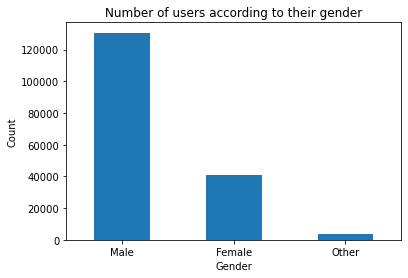

In [17]:
genders = df_clean['member_gender'].value_counts()
genders.plot.bar(rot=0);
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title("Number of users according to their gender");

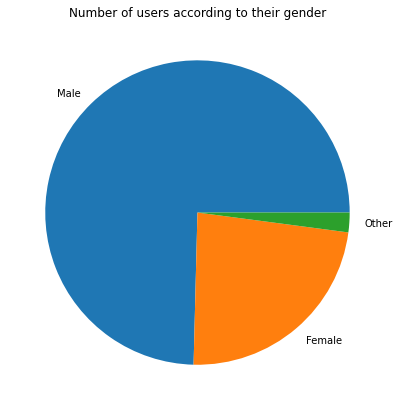

In [22]:
plt.figure(figsize=[10, 7])
labels = ['Male', 'Female', 'Other']
plt.pie(genders, labels = labels);
plt.title("Number of users according to their gender");

> The dataset contains many males than females.

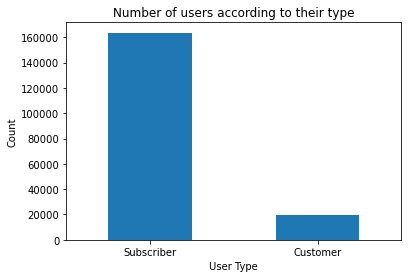

In [18]:
user_type = df_clean['user_type'].value_counts();
user_type.plot.bar(rot=0);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title("Number of users according to their type");

> The dataset has more subscribers than customers

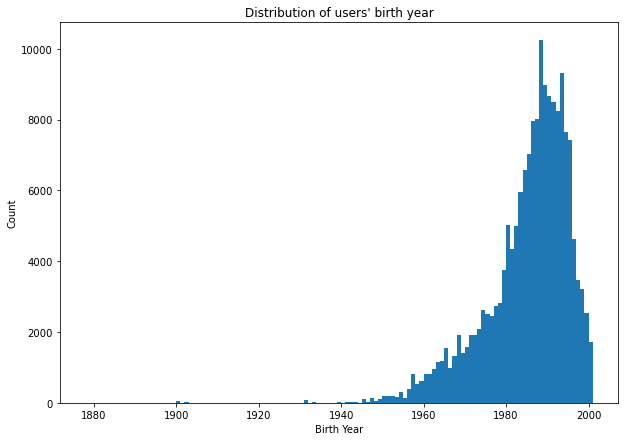

In [24]:
plt.figure(figsize=[10, 7])

bins = np.arange(df_clean['member_birth_year'].min(), df_clean['member_birth_year'].max() + 1)

plt.hist(df_clean['member_birth_year'], bins= bins);
plt.xlabel('Birth Year');
plt.ylabel('Count');
plt.title("Distribution of users' birth year");

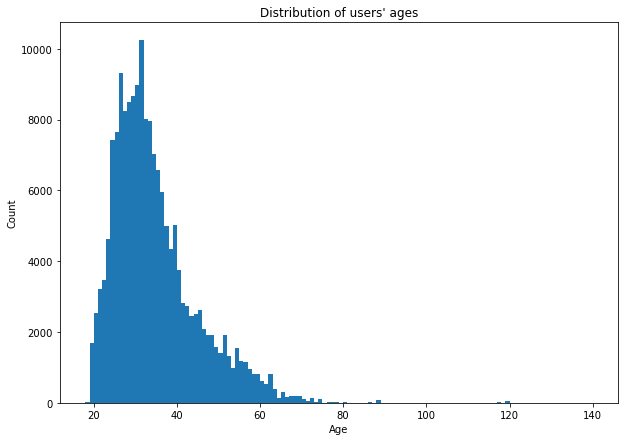

In [25]:
plt.figure(figsize=[10, 7])

bins = np.arange(df_clean['age'].min(), df_clean['age'].max())

plt.hist(df_clean['age'], bins = bins);
plt.xlabel('Age');
plt.ylabel('Count');
plt.title("Distribution of users' ages");

> The majority of users' birth is between 1979 (~ 41 years old) and 1997 (~ 22 years old).

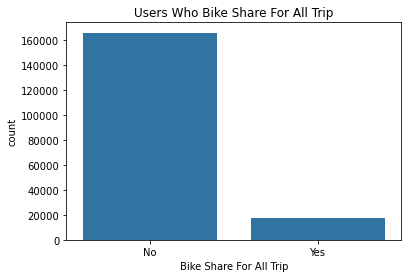

In [21]:
base_color = sb.color_palette()[0]

sb.countplot(data = df_clean, x = 'bike_share_for_all_trip', color= base_color);
plt.xlabel('Bike Share For All Trip');
plt.title("Users Who Bike Share For All Trip");

> The bike share system in San Francisco is not used by the majority of users.

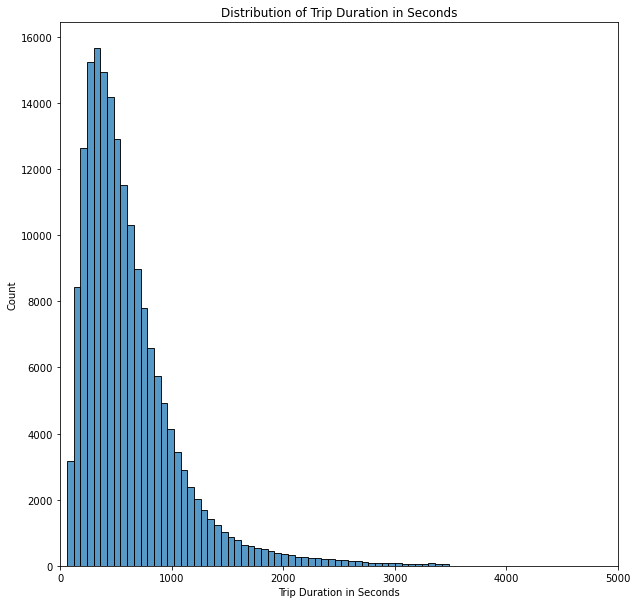

In [19]:
plt.figure(figsize=[10, 10])
bins = np.arange(df_clean['duration_sec'].min(), df_clean['duration_sec'].quantile(0.99) + 60, 60)
sb.histplot(data = df_clean, x='duration_sec', bins = bins);
plt.xlim(0, 5000);
plt.xlabel('Trip Duration in Seconds');
plt.title("Distribution of Trip Duration in Seconds");

> The trip duration (in seconds) is right skewed. Most trips take between ~ 50 - 1000 sec

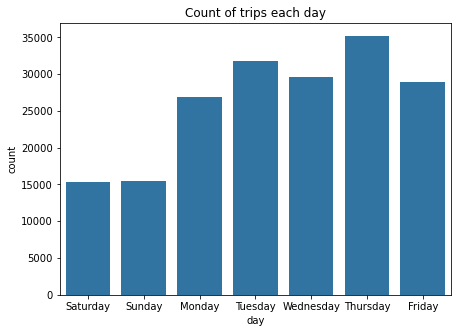

In [22]:
days = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.figure(figsize=[7, 5])
sb.countplot(data = df_clean, x='day', color = base_color, order = days);
plt.title("Count of trips each day");

> Users tends to take bike trips more on Thursday, then Tuesday, then Wednesday. On the weekend the number of trips is roughly the same on Saturdays and Sundays.

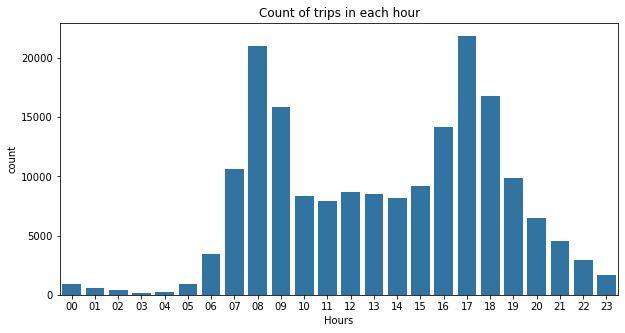

In [23]:
hour_order = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19',
              '20','21','22','23']
plt.figure(figsize=[10, 5])
sb.countplot(data = df_clean, x='time_of_day', color = base_color, order=hour_order);
plt.xlabel('Hours');
plt.title("Count of trips in each hour");

> Most trips takes place at 5 PM and at 8 AM. Obviously, There are not many trips from 12 AM to 5 AM.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The dataset contains many males than females.
- The distribution of users' age is right skewed. The majority of users' birth is between 1979 (~ 41 years old) and 1997 (~ 22 years old).
- Users tends to take bike trips more on Thursday, then Tuesday, then Wednesday. On the weekend the number of trips is roughly the same on Saturdays and Sundays. That is normal which may indicate that users take bikes for trips during working days.
- The distribution of the hours of day is binormal. Most trips takes place between 7 - 9 AM and at 4 - 6 PM. Obviously, There are not many trips from 12 AM to 5 AM.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The distributions seem normal and logical. Data wrangling process envolved simple steps for changing categorical data types as 'Categorical' to be able to plot using Seaborn. Changing the time (start time and end time) to pandas datetime type to easily extract the hours of day and day of week from the dates.

## Bivariate Exploration



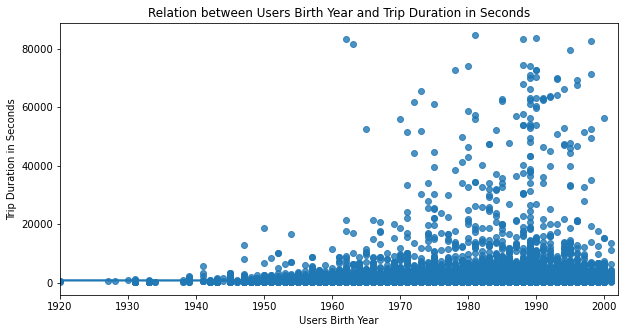

In [24]:
plt.figure(figsize=[10, 5])
sb.regplot(data = df_clean, x='member_birth_year', y='duration_sec');
plt.xlim(1920, 2002);
plt.xlabel('Users Birth Year');
plt.ylabel('Trip Duration in Seconds');
plt.title('Relation between Users Birth Year and Trip Duration in Seconds');

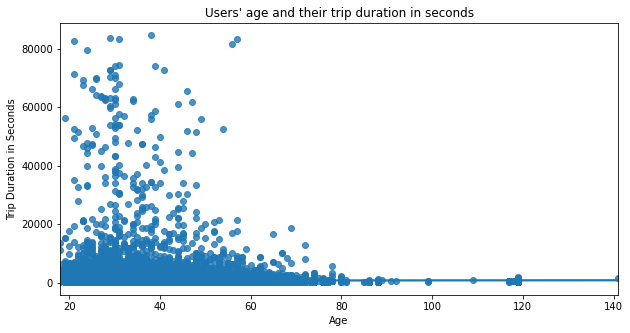

In [25]:
plt.figure(figsize=[10, 5])
sb.regplot(data = df_clean, x='age', y='duration_sec');
plt.xlabel('Age');
plt.ylabel('Trip Duration in Seconds');
plt.title('Users\' age and their trip duration in seconds');

> People who are between 20 and 40 years old tends to take more time in there trips.

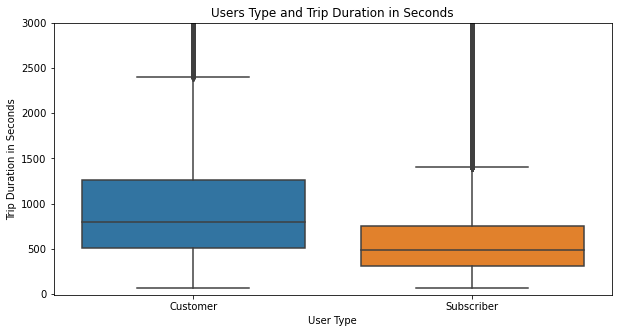

In [26]:
plt.figure(figsize=[10, 5])
sb.boxplot(data = df_clean, x='user_type', y='duration_sec');
plt.ylim(-10, 3000);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Seconds');
plt.title('Users Type and Trip Duration in Seconds');

> Customers spends more time in their bike trips more than subscribers.

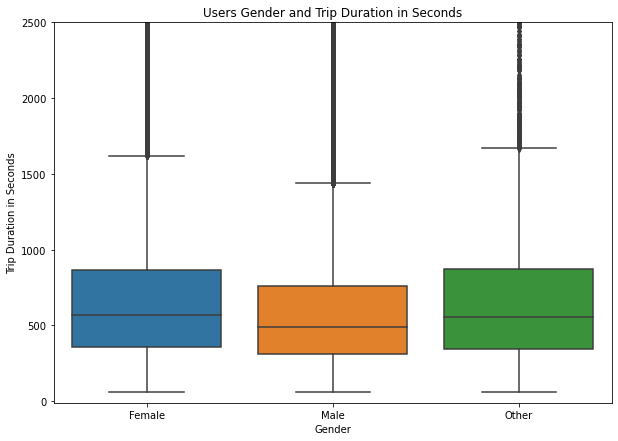

In [27]:
plt.figure(figsize=[10, 7])
sb.boxplot(data = df_clean, x='member_gender', y='duration_sec');
plt.ylim(-10, 2500);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Seconds');
plt.title('Users Gender and Trip Duration in Seconds');

> Female users average bike trip duration is slightly more than male users.

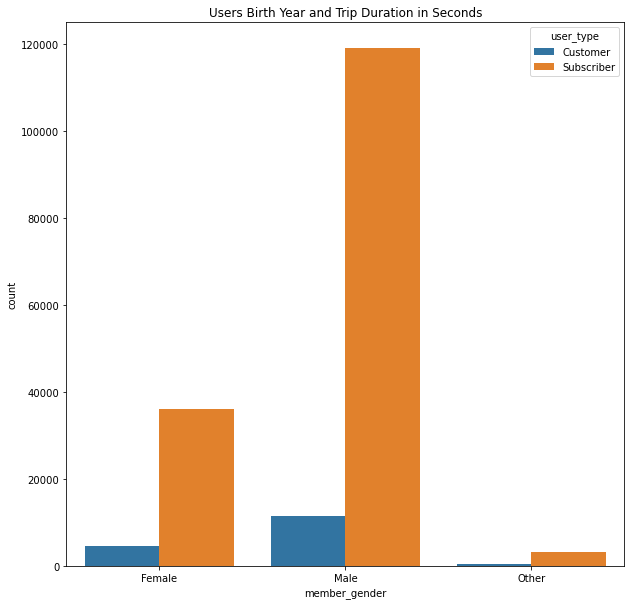

In [28]:
plt.figure(figsize = [10, 10]);

sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type');

plt.title('Users Birth Year and Trip Duration in Seconds');

> Subscribed users numbers are way more greater than customers despite of the gender.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- People who are between 20 and 40 years old tends to take more time in there trips.
- Customers spends more time in their bike trips more than subscribers.
- Female users average bike trip duration is slightly more than male users.
- Subscribed users numbers are way more greater than customers despite of the gender.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Trip duration in female users and customer users is longer despite of their low count in the dataset.

## Multivariate Exploration


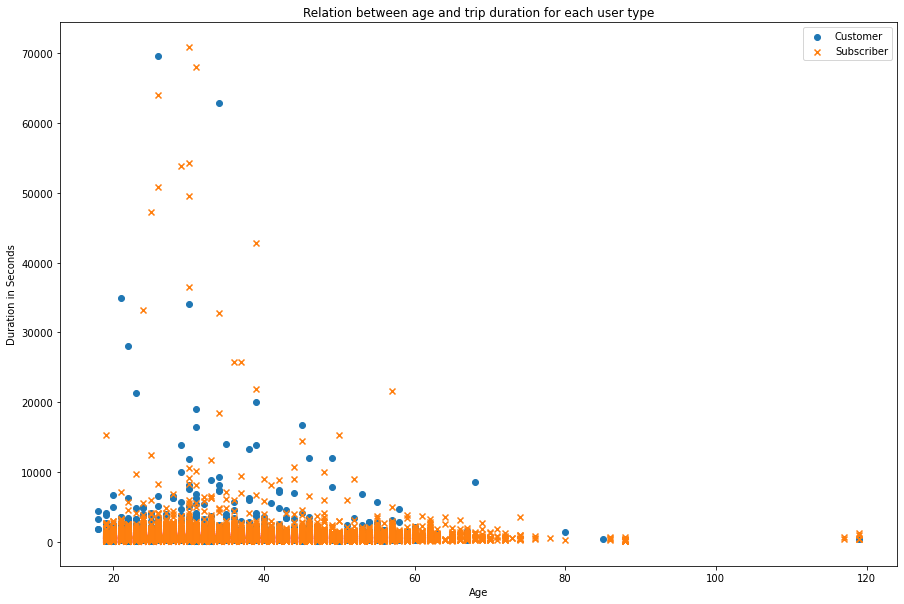

In [29]:
df_sample = df_clean.sample(20000, random_state=1)

plt.figure(figsize = [15, 10]);
user_type_markers = [['Customer', 'o'],
               ['Subscriber', 'x']]

for cat, marker in user_type_markers:
    df_cat = df_sample[df_sample['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'age', y = 'duration_sec', marker = marker);
    
plt.legend(['Customer','Subscriber']);
plt.xlabel('Age');
plt.ylabel('Duration in Seconds');
plt.title("Relation between age and trip duration for each user type");

- The majority of older users are Subscribers and they spend little time in their bike trips.
- Younger Customers trip duration is slightly more than younger subscribers.

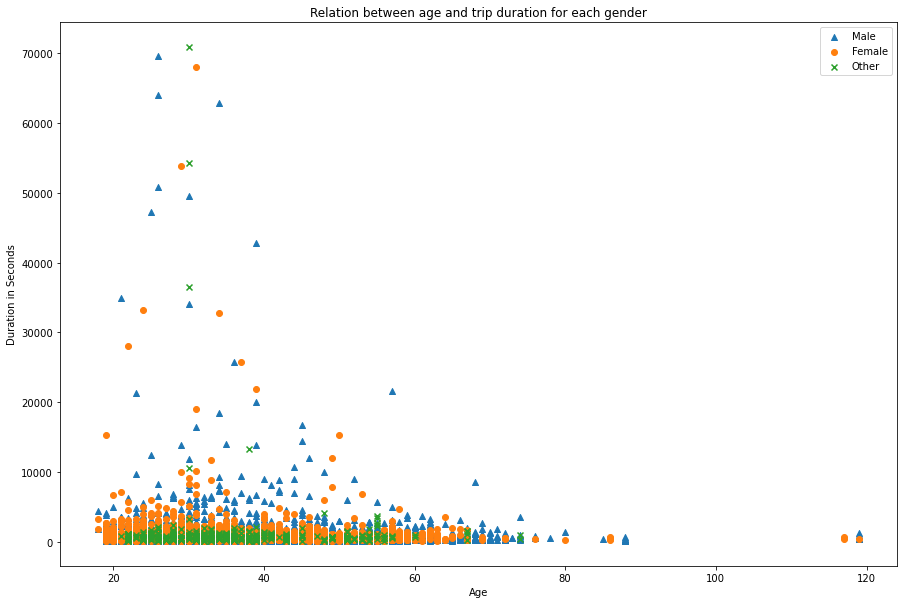

In [30]:
# Note: I used the same sample of the above visualization.

plt.figure(figsize = [15, 10]);
user_type_markers = [['Male', '^'], ['Female', 'o'], ['Other', 'x']]

for cat, marker in user_type_markers:
    df_cat = df_sample[df_sample['member_gender'] == cat]
    plt.scatter(data = df_cat, x = 'age', y = 'duration_sec', marker = marker);

plt.legend(['Male', 'Female', 'Other']);
plt.xlabel('Age');
plt.ylabel('Duration in Seconds');
plt.title("Relation between age and trip duration for each gender");

- The majority of older users are male users and they spend little time in their bike trips.
- Younger male users' trip duration is slightly more than the younger users of other genders.

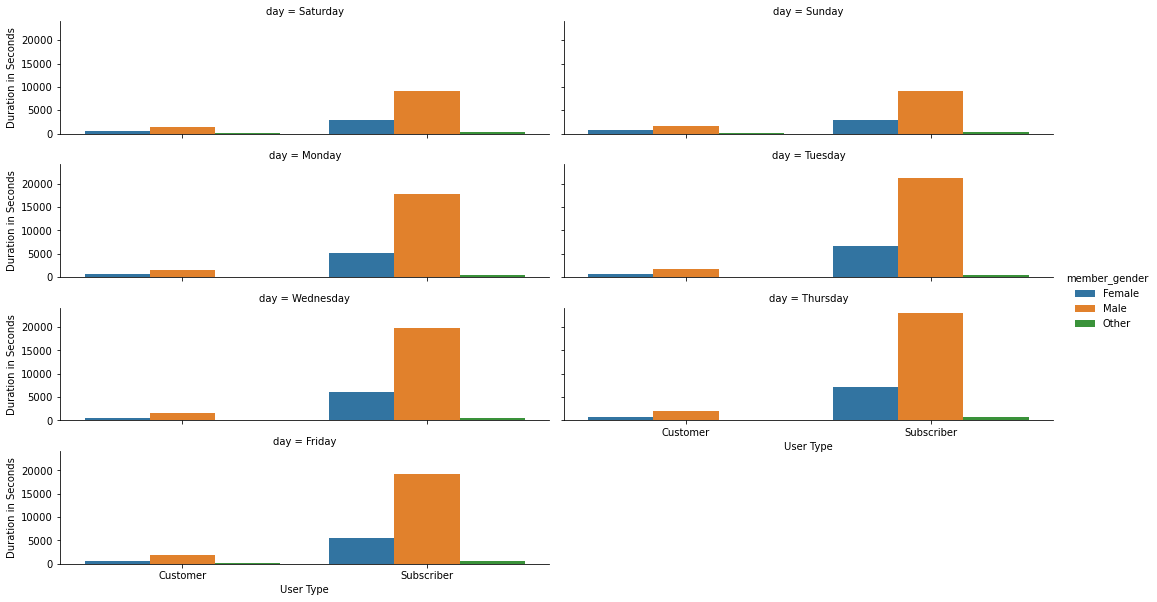

In [33]:
days = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

g = sb.catplot(data = df_clean, x = 'user_type', col = 'day', col_wrap=2,
               height = 8.27/4, aspect = (14.70/2)/(8.27/4), hue = 'member_gender', kind="count", col_order=days);
g.set_axis_labels('User Type', 'Duration in Seconds');

- Customer male users and Subscriber male users are more than other customer/subscriber female/other users.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Customer male users and Subscriber male users are more than other customer/subscriber female/other users.
- The majority of older users are male users and they spend little time in their bike trips.
- The majority of older users are Subscribers and they spend little time in their bike trips.
- Younger male users' trip duration is slightly more than the younger users of other genders.
- Younger Customers trip duration is slightly more than younger subscribers.

### Were there any interesting or surprising interactions between features?

- No.